In [ ]:
# Machine Learning Analysis

#This section applies unsupervised machine learning (KMeans clustering and PCA) to identify congestin in airports.

In [5]:
# ===  IMPORTS ===
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as disp

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# ===  LOAD DATA ===
flights = pd.read_csv("final_enriched_airport_dataset.csv")
weather = pd.read_csv("weather_meteo_by_airport.csv")
airports = pd.read_csv("airports.csv")

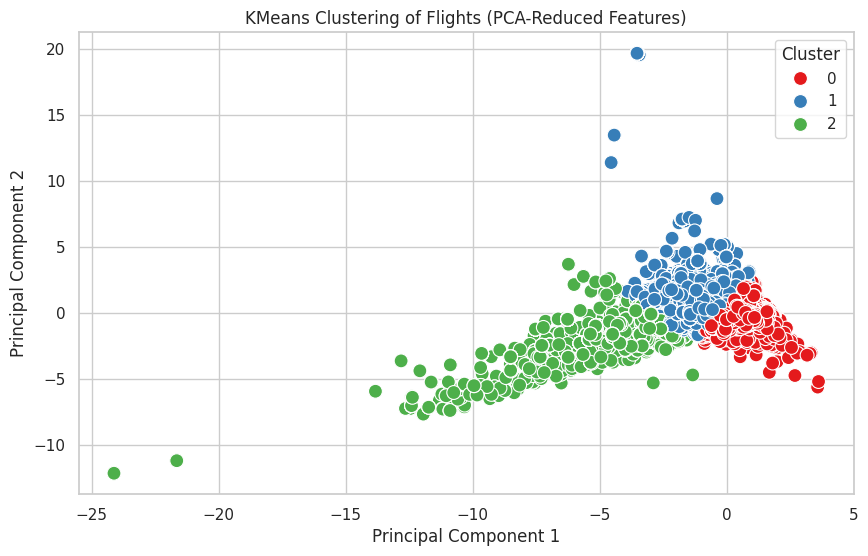

In [8]:
# ===  APPLY KMEANS ===
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
# ===  ATTACH CLUSTERS + PCA RESULTS ===
df_clustered = df.loc[df_cluster.index].copy()
df_clustered['PC1'] = X_pca[:, 0]
df_clustered['PC2'] = X_pca[:, 1]
df_clustered['Cluster'] = clusters

# ===  PLOT CLUSTERS ===
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_clustered, palette='Set1', s=100)
plt.title("KMeans Clustering of Flights (PCA-Reduced Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Cluster 0 - Low delay / good weather
# Cluster 1 - High delay  / severe weather
# Cluster 2 - Operational issues

In [14]:
# ===  DISPLAY 5 FLIGHTS PER CLUSTER ===
display_cols = ['FlightDate', 'IATA_CODE', 'CITY', 'Dep_Delay', 'Arr_Delay',
                'Flight_Duration', 'Precipitation', 'Snow', 'WindSpeed', 'AvgTemp', 'Cluster']

for cluster_id in sorted(df_clustered['Cluster'].unique()):
    print(f"\n=== Sample Flights from Cluster {cluster_id} ===")
    disp.display(df_clustered[df_clustered['Cluster'] == cluster_id][display_cols].head(5))


=== Sample Flights from Cluster 0 ===


,FlightDate,IATA_CODE,CITY,Dep_Delay,Arr_Delay,Flight_Duration,Precipitation,Snow,WindSpeed,AvgTemp,Cluster
0,2023-01-11,ABE,Allentown,0.0,0.0,0.0,0.0,0.0,9.0,2.3,0
3,2023-01-11,ABE,Allentown,-11.0,0.0,0.0,0.0,0.0,9.0,2.3,0
5,2023-03-31,ABE,Allentown,0.0,0.0,0.0,0.3,0.0,7.2,3.8,0
6,2023-04-20,ABE,Allentown,0.0,0.0,0.0,0.0,0.0,9.4,13.4,0
8,2023-04-04,ABE,Allentown,0.0,0.0,0.0,0.0,0.0,8.6,14.1,0



=== Sample Flights from Cluster 1 ===


,FlightDate,IATA_CODE,CITY,Dep_Delay,Arr_Delay,Flight_Duration,Precipitation,Snow,WindSpeed,AvgTemp,Cluster
1,2023-01-12,ABE,Allentown,-5.0,0.0,0.0,4.1,0.0,11.2,4.1,1
2,2023-01-22,ABE,Allentown,0.0,0.0,0.0,9.1,0.0,10.1,2.1,1
4,2023-02-24,ABE,Allentown,-9.0,0.0,0.0,0.0,0.0,19.4,6.4,1
7,2023-04-01,ABE,Allentown,-4.0,0.0,0.0,11.9,0.0,21.2,14.8,1
9,2023-04-05,ABE,Allentown,-5.0,0.0,0.0,0.0,0.0,16.9,13.2,1



=== Sample Flights from Cluster 2 ===


,FlightDate,IATA_CODE,CITY,Dep_Delay,Arr_Delay,Flight_Duration,Precipitation,Snow,WindSpeed,AvgTemp,Cluster
307,2023-01-13,ABR,Aberdeen,0.0,0.0,0.0,0.0,180.0,19.8,-10.1,2
308,2023-01-03,ABR,Aberdeen,0.0,0.0,0.0,0.0,180.0,20.5,-10.2,2
309,2023-01-04,ABR,Aberdeen,0.0,0.0,0.0,0.0,180.0,23.0,-6.2,2
310,2023-02-21,ABR,Aberdeen,0.0,0.0,0.0,6.4,130.0,20.9,-14.8,2
311,2023-02-22,ABR,Aberdeen,0.0,0.0,0.0,4.3,200.0,40.3,-17.4,2


In [15]:
# ===  DISPLAY TOP 10 FLIGHTS WITH HIGHEST TOTAL DELAYS ===
df_clustered['Total_Delay'] = df_clustered['Dep_Delay'] + df_clustered['Arr_Delay']
top_delays = df_clustered.sort_values(by='Total_Delay', ascending=False).head(10)

print("\n=== Top 10 Flights with Highest Total Delays ===")
disp.display(top_delays[display_cols + ['Total_Delay']])



=== Top 10 Flights with Highest Total Delays ===


,FlightDate,IATA_CODE,CITY,Dep_Delay,Arr_Delay,Flight_Duration,Precipitation,Snow,WindSpeed,AvgTemp,Cluster,Total_Delay
2097,2023-02-13,ATL,Atlanta,2414.0,0.0,0.0,0.0,0.0,6.4,8.8,0,2414.0
92900,2023-03-16,SDF,Louisville,2368.0,0.0,0.0,0.3,0.0,18.0,9.7,0,2368.0
13319,2023-01-27,BUR,Burbank,2168.0,0.0,0.0,0.0,0.0,4.3,12.5,0,2168.0
36753,2023-10-16,DTW,Detroit,1781.0,0.0,0.0,0.0,0.0,16.4,9.9,0,1781.0
50352,2023-01-05,JAC,Jackson,1744.0,0.0,0.0,5.8,0.0,5.3,-7.6,0,1744.0
33981,2023-09-03,DFW,Dallas-Fort Worth,1650.0,0.0,0.0,5.1,0.0,13.0,30.4,0,1650.0
101774,2023-06-12,TPA,Tampa,1626.0,0.0,0.0,0.0,0.0,13.3,29.0,0,1626.0
96071,2023-09-13,SFO,San Francisco,1618.0,0.0,0.0,0.0,0.0,13.7,17.7,0,1618.0
75493,2023-03-08,MTJ,Montrose,1588.0,0.0,0.0,0.0,0.0,10.6,4.3,0,1588.0
1221,2023-02-27,APN,Alpena,1553.0,0.0,0.0,7.9,280.0,16.6,-7.8,2,1553.0


In [13]:


# === 2) MERGE FLIGHTS + WEATHER ===
flights['FlightDate'] = pd.to_datetime(flights['FlightDate'], errors='coerce')
weather['time'] = pd.to_datetime(weather['time'], errors='coerce')
weather = weather.rename(columns={
    'airport_id': 'IATA_CODE',
    'tavg': 'AvgTemp',
    'prcp': 'Precipitation',
    'snow': 'Snow',
    'wspd': 'WindSpeed'
})
df = pd.merge(flights, weather, how='left',
              left_on=['IATA_CODE', 'FlightDate'],
              right_on=['IATA_CODE', 'time'])

# === 3) ADD CITY INFO ===
df = pd.merge(df, airports[['IATA_CODE', 'CITY']], on='IATA_CODE', how='left')

# === 4) SELECT FEATURES FOR CLUSTERING ===
features = ['Dep_Delay', 'Arr_Delay', 'Flight_Duration',
            'Precipitation', 'Snow', 'WindSpeed', 'AvgTemp']
df_cluster = df[features].dropna()

# === 5) STANDARDIZE + PCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [12]:
from google.colab import files
uploaded = files.upload()

Saving weather_meteo_by_airport.csv to weather_meteo_by_airport (1).csv


In [11]:
from google.colab import files
uploaded = files.upload()

Saving final_enriched_airport_dataset.csv to final_enriched_airport_dataset (1).csv


In [1]:
from google.colab import files
uploaded = files.upload()

Saving airports.csv to airports.csv
